In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [ ]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
df = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [4]:
df = df[ df.select_dtypes(include=np.number).columns.tolist()]

In [5]:
df.dropna(inplace=True)

In [6]:
#GrLivArea: Above grade (ground) living area square feet

In [7]:
def f(x, data_reg):
    P = [i for i in range(len(data_reg))]
    P.reverse()
    predicted = sum( [a*(x**p) for a, p in zip(data_reg, P) ] )
    return predicted

In [8]:
def pearson(df, attribute, data_reg):
    M = df["SalePrice"].mean()
    Y = df["SalePrice"].tolist()
    X = df[attribute].tolist()
    
    SSres = sum( [(y-f(x, data_reg))**2 for y, x in zip(Y,X)] )
    SStot = sum( [(y-M)**2 for y in Y ] )
    
    R2 = 1-(SSres/SStot)
    return R2

In [74]:
deg = 1
attribute = "GrLivArea"
data_reg = np.polyfit(df[attribute], df["SalePrice"], deg)
data_reg2 = np.polyfit(df[attribute], df["SalePrice"], deg+1)

In [75]:
predicted = np.polyval(data_reg, df[attribute].tolist())
measured = df["SalePrice"]
if deg == 1:
    corr = stats.pearsonr(predicted, measured)[0]
    #corr = pearson(df, attribute, data_reg)
elif deg > 1:
    corr = stats.spearmanr(predicted, measured)[0]

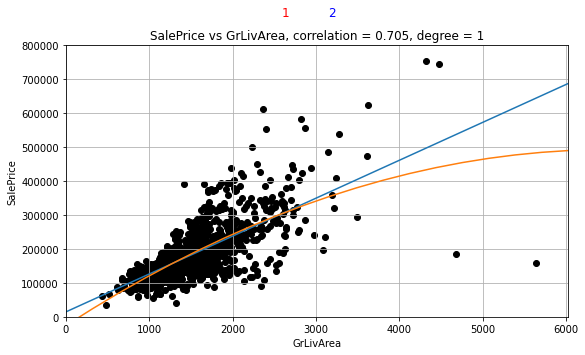

In [77]:
xp = np.linspace(1, df[attribute].max()+df[attribute].mean()/4, 20)

fig = plt.figure(figsize=(9,5))
ax = plt.axes()
plt.scatter(df[attribute], df["SalePrice"], label = f"SalePrice vs {attribute}", color="black")

ax.plot(xp, np.polyval(data_reg, xp))
ax.plot(xp, np.polyval(data_reg2, xp))

plt.figtext(0.47, 0.96, f"{deg}", fontsize='large', color='r', ha ='right')
plt.figtext(0.53, 0.96, f"{deg+1}", fontsize='large', color='b', ha ='left')
#plt.figtext(0.50, 0.96, ' vs ', fontsize='large', color='k', ha ='center')

ax.set_ylim(bottom=0, top = df["SalePrice"].max()+df["SalePrice"].mean()/4)
ax.set_xlim(0, df[attribute].max()+df[attribute].mean()/4)
ax.set_title(f"SalePrice vs {attribute}, correlation = {round(corr, 3)}, degree = {deg}")
#ax.set_title(f"SalePrice vs GrLivArea, R2= {round(R2, 3)}")
ax.set_xlabel(f"{attribute}")
ax.set_ylabel("SalePrice")
ax.grid()

In [ ]:
deg = 1
attribute = "GrLivArea"
data_reg = np.polyfit(df[attribute], df["SalePrice"], deg)

R2 = pearson(df, attribute, data_reg)
"""
same as;
xp = np.polyval(data_reg, df[attribute].tolist())
yp = df["SalePrice"]
R2 = stats.pearsonr(xp, yp)[0]**2
"""
print(R2)